## Outlier Detection and Removal Using Percentile

<font color='green'> 
**Youtube - codebasics kanalı - Feature Engineering Tutorial Python serisi**  

Dhaval Patel aykırı değerlerin percentile kullanarak tespit edilmesini ve kaldırılmasını anlattı. *Heights* ve *Mangalore Property Prices* datasetlerini kullandı.
</font>

**Video**: [Outlier detection and removal using percentile | Feature Engineering tutorial python # 2](https://www.youtube.com/watch?v=7sJaRHF03K8)

### İçindekiler

**Percentile Nedir?**

**1. Outlier Değerleri Tespit Etmek**
* Maximum thresholdu tanımlamak
* Minimum thresholdu tanımlamak

**2. Outlier Değerleri Kaldırmak**

**3. Mangalore Property Prices Dataset üzerinden Outlier Değerlerinin Tespiti ve Kaldırılması**

### <font color="blue"> Giriş </font>

Outlier değerleri istatistiksel olarak belirlemenin birçok yolu var. Bunlar percentile (yüzdelik), z-score, standart sapma, görselleştirme (boxplot/scatter plot) vs. olabilir. Bu notebookta percentile yolu ile belirlemeyi öğreneceğiz. 

#### Percentile Nedir?

9 kişinin 100 üzerinden test skorunu yazdık. Bunların yüzdeleri de aynı değerde olacaktır çünkü zaten 100 üzerinden hesaplama yaptık. Fakat bazen göreceli puanlama tekniği kullanılır. 69 en yüksek puan olarak tanımlanır ve denir ki bu kişi %100 başarmıştır. 27 en düşük puan olarak belirlenir ve bu kişi %0 başarmıştır denir. Burada %50 başarı şu demek: sample'ların %50'si 56 değerinin altındadır. Toplamda 9 sample vardı, 56'yı saymıyoruz, 4'ü 56 değerinin altında (27,32,45,45).

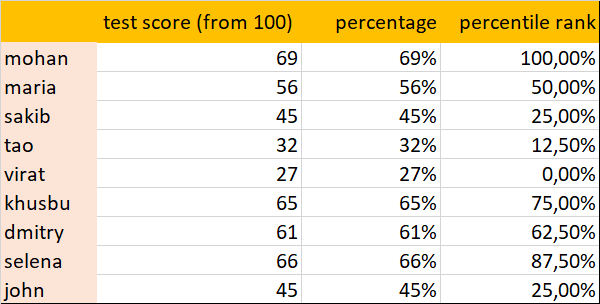

### <font color="black"> 1. Outlier Değerleri Tespit Etmek </font>

In [1]:
import pandas as pd

Bir giyim şirketi insanların boylarını analiz etmek istiyor ki ona göre kıyafet dizayn edebilsin.

In [6]:
df = pd.read_csv("heights.csv")

In [7]:
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


`df['height']` yazdığımızda numpy array döndürüyor bize. Bunun üzerinden quantile çağırabiliyoruz. Bu bize yüzdelik (percentile) değeri verecek bize. 

In [14]:
df['height'].quantile() # ortadaki değeri veriyor.

5.55

In [27]:
df['height'].quantile(0.5)

5.55

In [15]:
df['height'].quantile(1) # en yüksek değeri %100 yani.

14.5

In [16]:
df['height'].quantile(0) # en düşük değeri %0 yani.

1.2

In [19]:
df['height'].quantile(0.25) 

5.25

In [22]:
df['height'].quantile(0.75)

6.175000000000001

In [20]:
df['height'].quantile(0.95) 

9.689999999999998

##### Maximum thresholdu tanımlamak

Biz %95. değerden sonrasını outlier kabul edebiliriz, bize bağlı bir şey bu.

In [25]:
max_threshold = df['height'].quantile(0.95)

In [26]:
df[df['height']>max_threshold] 

,name,height
9,imran,14.5


1 feet= 0.3 metre. Dolayısıyla 4.35 metre birini bulabilmek imkansız bir şey.

##### Minimum thresholdu tanımlamak

%5. değerden aşağısını outlier kabul edebiliriz.

In [29]:
min_threshold = df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [31]:
df[df['height']<min_threshold]

,name,height
12,yoseph,1.2


Bu veri seti yetişkinlere ait bir veri seti olduğu için 0.36 metre yetişkin insan boyunu normal bir boy kabul edemeyiz.

**Eğer domain bilgimiz varsa direkt şu değerden fazlasını outlier kabul et diyebiliriz. Mesela bu case'te 7.5 fitten fazlasını outlier kabul et diyebiliriz direkt quantile hesaplamadan.**

### <font color="black">2. Outlier Değerleri Kaldırmak </font>

Maximum thresholddan az olanları ve minimum thresholddan büyük olanları listeliyoruz.

In [32]:
df[(df['height']<max_threshold) & (df['height']>min_threshold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


### <font color="black"> 3. Mangalore Property Prices Dataset üzerinden Outlier Değerlerinin Tespiti ve Kaldırılması </font>

In [33]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [34]:
df.shape

(13200, 7)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,1555.302783,1237.323445,1.0,1100.0,1275.00,1672.0,52272.0
bath,13200.0,2.691136,1.338915,1.0,2.0,2.00,3.0,40.0
price,13200.0,112.276178,149.175995,8.0,50.0,71.85,120.0,3600.0
bhk,13200.0,2.800833,1.292843,1.0,2.0,3.00,3.0,43.0
price_per_sqft,13200.0,7920.336742,106727.160328,267.0,4267.0,5438.00,7317.0,12000000.0


- **total_sqft** (total square feet) değişkeni için konuşacak olursak %75'inin 1672 değerinin altında olduğunu anlıyoruz. 
- **price_per_sqft** (Price per square foot) değişkenine baktığımızda sample'larımızın %75'inin 7317 rupi altında olacağını anlıyoruz. Max değerine baktığımızda ise 12,000 ,000 rupi olduğunu görüyoruz. Bu oldukça yüksek bir değer. Dolayısıyla burada bir hata olmalı. Bu tarz değerler modelimizin performansını önemli ölçüde etkiliyor.

In [37]:
min_threshold, max_threshold = df["price_per_sqft"].quantile([0.001, 0.999]) 
# quantile yüzdelik değerlerini bu şekilde liste içinde de belirtebiliyoruz.

min_threshold, max_threshold
# Bangalore çok pahalı bir şehir olduğu için 
# metrekare başına 1366.184 rupiden daha az bir ev bulabilmek mümkün değil.

(1366.184, 50959.36200000099)

In [38]:
df[df["price_per_sqft"]<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [39]:
df[df["price_per_sqft"]>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


Buradaki değerler gerçekten doğru olsa bile bizim modelimizin performansını etkileyeceğinden bu değerleri kaldırıyoruz. Bunu yeni dataframe oluşturarak yapıyoruz.

In [40]:
df2 = df[(df["price_per_sqft"]>min_threshold) & (df["price_per_sqft"]<max_threshold)]

In [41]:
df2.shape

(13172, 7)

Normalde datamız 13200 adetti, 13172'ye düştü outlierları kaldırınca.

In [42]:
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10631,JP Nagar,2 BHK,1060.0,2.0,33.95,2,3202
397,Whitefield,4 BHK,3252.0,4.0,230.00,4,7072
12324,Kundalahalli,4 Bedroom,1500.0,4.0,235.00,4,15666
5458,Kanakpura Road,2 BHK,1309.0,2.0,64.39,2,4919
4985,Rajaji Nagar,1 BHK,660.0,1.0,75.00,1,11363
7181,5th Phase JP Nagar,2 BHK,1200.0,2.0,51.00,2,4250
7570,Marathahalli,3 BHK,1200.0,2.0,58.17,3,4847
1729,Sanjay nagar,3 BHK,1800.0,3.0,180.00,3,10000
1818,Raja Rajeshwari Nagar,2 BHK,1185.0,2.0,47.39,2,3999
6447,Whitefield,2 BHK,1216.0,2.0,69.00,2,5674
